# Programming Assignment: 
## Готовим LDA по рецептам

Как вы уже знаете, в тематическом моделировании делается предположение о том, что для определения тематики порядок слов в документе не важен; об этом гласит гипотеза «мешка слов». Сегодня мы будем работать с несколько нестандартной для тематического моделирования коллекцией, которую можно назвать «мешком ингредиентов», потому что на состоит из рецептов блюд разных кухонь. Тематические модели ищут слова, которые часто вместе встречаются в документах, и составляют из них темы. Мы попробуем применить эту идею к рецептам и найти кулинарные «темы». Эта коллекция хороша тем, что не требует предобработки. Кроме того, эта задача достаточно наглядно иллюстрирует принцип работы тематических моделей.

Для выполнения заданий, помимо часто используемых в курсе библиотек, потребуются модули *json* и *gensim*. Первый входит в дистрибутив Anaconda, второй можно поставить командой 

*pip install gensim*

Построение модели занимает некоторое время. На ноутбуке с процессором Intel Core i7 и тактовой частотой 2400 МГц на построение одной модели уходит менее 10 минут.

### Загрузка данных

Коллекция дана в json-формате: для каждого рецепта известны его id, кухня (cuisine) и список ингредиентов, в него входящих. Загрузить данные можно с помощью модуля json (он входит в дистрибутив Anaconda):

In [1]:
import json

In [2]:
with open("recipes.json") as f:
    recipes = json.load(f)

In [3]:
print(recipes[0])

{'id': 10259, 'cuisine': 'greek', 'ingredients': ['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']}


### Составление корпуса

In [6]:
from gensim import corpora, models
import numpy as np

Using TensorFlow backend.
/home/agekyan/.conda/envs/psheenv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/agekyan/.conda/envs/psheenv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/agekyan/.conda/envs/psheenv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/agekyan/.conda/en

Наша коллекция небольшая, и целиком помещается в оперативную память. Gensim может работать с такими данными и не требует их сохранения на диск в специальном формате. Для этого коллекция должна быть представлена в виде списка списков, каждый внутренний список соответствует отдельному документу и состоит из его слов. Пример коллекции из двух документов: 

[["hello", "world"], ["programming", "in", "python"]]

Преобразуем наши данные в такой формат, а затем создадим объекты corpus и dictionary, с которыми будет работать модель.

In [7]:
texts = [recipe["ingredients"] for recipe in recipes]
dictionary = corpora.Dictionary(texts)   # составляем словарь
corpus = [dictionary.doc2bow(text) for text in texts]  # составляем корпус документов

In [8]:
print(texts[0])
print(corpus[0])

['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


У объекта dictionary есть полезная переменная dictionary.token2id, позволяющая находить соответствие между ингредиентами и их индексами.

### Обучение модели
Вам может понадобиться [документация](https://radimrehurek.com/gensim/models/ldamodel.html) LDA в gensim.

__Задание 1.__ Обучите модель LDA с 40 темами, установив количество проходов по коллекции 5 и оставив остальные параметры по умолчанию. 


Затем вызовите метод модели *show_topics*, указав количество тем 40 и количество токенов 10, и сохраните результат (топы ингредиентов в темах) в отдельную переменную. Если при вызове метода *show_topics* указать параметр *formatted=True*, то топы ингредиентов будет удобно выводить на печать, если *formatted=False*, будет удобно работать со списком программно. Выведите топы на печать, рассмотрите темы, а затем ответьте на вопрос:

Сколько раз ингредиенты "salt", "sugar", "water", "mushrooms", "chicken", "eggs" встретились среди топов-10 всех 40 тем? При ответе __не нужно__ учитывать составные ингредиенты, например, "hot water".

Передайте 6 чисел в функцию save_answers1 и загрузите сгенерированный файл в форму.

У gensim нет возможности фиксировать случайное приближение через параметры метода, но библиотека использует numpy для инициализации матриц. Поэтому, по утверждению автора библиотеки, фиксировать случайное приближение нужно командой, которая написана в следующей ячейке. __Перед строкой кода с построением модели обязательно вставляйте указанную строку фиксации random.seed.__

In [9]:
np.random.seed(76543)
# здесь код для построения модели:
lda = models.LdaModel(corpus, num_topics=40, passes=5)

In [10]:
lda.show_topics(num_topics=40, num_words=10, formatted=False)

[(0,
  [('212', 0.05225377977993424),
   ('362', 0.03570444578638662),
   ('26', 0.03528551365350228),
   ('228', 0.03339553838559049),
   ('105', 0.03308297449307879),
   ('669', 0.032542235493637404),
   ('161', 0.03177142423745316),
   ('629', 0.03176279524663153),
   ('19', 0.030535098207290702),
   ('89', 0.028073506396233978)]),
 (1,
  [('204', 0.0938830046398903),
   ('47', 0.07723599236949485),
   ('11', 0.06928966859655218),
   ('115', 0.0645597120128743),
   ('50', 0.050080548513999554),
   ('312', 0.04346102340638939),
   ('27', 0.03620340334014721),
   ('365', 0.02653907969609199),
   ('531', 0.026498368386956846),
   ('52', 0.023663597571690596)]),
 (2,
  [('146', 0.08554318370976846),
   ('475', 0.07927953110153554),
   ('555', 0.07324429656800735),
   ('48', 0.06416299880996343),
   ('309', 0.05619921961913635),
   ('124', 0.042188619394084616),
   ('781', 0.03012220302057079),
   ('652', 0.03005543275062138),
   ('200', 0.02472166266811287),
   ('613', 0.022668417466848

In [11]:
c_salt = 0
c_sugar = 0
c_water = 0
c_mushrooms = 0
c_chicken = 0
c_eggs = 0

for topic in lda.show_topics(num_topics=40, num_words=10, formatted=False):
    for c in topic[1]:
        if dictionary[int(c[0])] == 'salt':
            c_salt += 1
        elif dictionary[int(c[0])] == 'sugar':
            c_sugar += 1
        elif dictionary[int(c[0])] == 'water':
            c_water += 1
        elif dictionary[int(c[0])] == 'mushrooms':
            c_mushrooms += 1
        elif dictionary[int(c[0])] == 'chicken':
            c_chicken += 1
        elif dictionary[int(c[0])] == 'eggs':
            c_eggs += 1

In [12]:
def save_answers1(c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs):
    with open("cooking_LDA_pa_task1.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs]]))

In [14]:
save_answers1(c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs)
c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs

(19, 8, 10, 0, 1, 2)

### Фильтрация словаря
В топах тем гораздо чаще встречаются первые три рассмотренных ингредиента, чем последние три. При этом наличие в рецепте курицы, яиц и грибов яснее дает понять, что мы будем готовить, чем наличие соли, сахара и воды. Таким образом, даже в рецептах есть слова, часто встречающиеся в текстах и не несущие смысловой нагрузки, и поэтому их не желательно видеть в темах. Наиболее простой прием борьбы с такими фоновыми элементами — фильтрация словаря по частоте. Обычно словарь фильтруют с двух сторон: убирают очень редкие слова (в целях экономии памяти) и очень частые слова (в целях повышения интерпретируемости тем). Мы уберем только частые слова.

In [24]:
import copy
dictionary2 = copy.deepcopy(dictionary)

__Задание 2.__ У объекта dictionary2 есть переменная *dfs* — это словарь, ключами которого являются id токена, а элементами — число раз, сколько слово встретилось во всей коллекции. Сохраните в отдельный список ингредиенты, которые встретились в коллекции больше 4000 раз. Вызовите метод словаря *filter_tokens*, подав в качестве первого аргумента полученный список популярных ингредиентов. Вычислите две величины: dict_size_before и dict_size_after — размер словаря до и после фильтрации.

Затем, используя новый словарь, создайте новый корпус документов, corpus2, по аналогии с тем, как это сделано в начале ноутбука. Вычислите две величины: corpus_size_before и corpus_size_after — суммарное количество ингредиентов в корпусе (для каждого документа вычислите число различных ингредиентов в нем и просуммируйте по всем документам) до и после фильтрации.

Передайте величины dict_size_before, dict_size_after, corpus_size_before, corpus_size_after в функцию save_answers2 и загрузите сгенерированный файл в форму.

In [25]:
filtr = [k for k in dictionary2.dfs.keys() if dictionary2.dfs[k] >= 4000]

In [26]:
filtr

[3, 4, 11, 13, 19, 27, 29, 35, 47, 54, 105, 115]

In [27]:
dict_size_before = len(dictionary2)
dict_size_before

6714

In [28]:
dictionary2.filter_tokens(filtr)

In [29]:
dict_size_after = len(dictionary2)
dict_size_after

6702

In [30]:
corpus2 = [dictionary2.doc2bow(text) for text in texts]

In [31]:
corpus_size_before = 0
for corp in corpus:
    corpus_size_before += len(corp)
    
corpus_size_after = 0
for corp in corpus2:
    corpus_size_after += len(corp)

corpus_size_before, corpus_size_after

(428249, 343665)

In [32]:
def save_answers2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after):
    with open("cooking_LDA_pa_task2.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [dict_size_before, dict_size_after, corpus_size_before, corpus_size_after]]))

In [33]:
save_answers2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after)
dict_size_before, dict_size_after, corpus_size_before, corpus_size_after

(6714, 6702, 428249, 343665)

### Сравнение когерентностей
__Задание 3.__ Постройте еще одну модель по корпусу corpus2 и словарю dictionary2, остальные параметры оставьте такими же, как при первом построении модели. Сохраните новую модель в другую переменную (не перезаписывайте предыдущую модель). Не забудьте про фиксирование seed!

Затем воспользуйтесь методом *top_topics* модели, чтобы вычислить ее когерентность. Передайте в качестве аргумента соответствующий модели корпус. Метод вернет список кортежей (топ токенов, когерентность), отсортированных по убыванию последней. Вычислите среднюю по всем темам когерентность для каждой из двух моделей и передайте в функцию save_answers3. 

In [34]:
np.random.seed(76543)
# здесь код для построения модели:
lda2 = models.LdaModel(corpus2, num_topics=40, passes=5)

In [45]:
tt = lda.top_topics(corpus = corpus)
tt2 = lda2.top_topics(corpus = corpus2)

In [46]:
coherence = np.mean([t[1] for t in tt])
coherence2 = np.mean([t[1] for t in tt2])

In [47]:
def save_answers3(coherence, coherence2):
    with open("cooking_LDA_pa_task3.txt", "w") as fout:
        fout.write(" ".join(["%3f"%el for el in [coherence, coherence2]]))

In [49]:
save_answers3(coherence, coherence2)
coherence, coherence2

(-703.2019367755069, -747.6959617371538)

Считается, что когерентность хорошо соотносится с человеческими оценками интерпретируемости тем. Поэтому на больших текстовых коллекциях когерентность обычно повышается, если убрать фоновую лексику. Однако в нашем случае этого не произошло. 

### Изучение влияния гиперпараметра alpha

В этом разделе мы будем работать со второй моделью, то есть той, которая построена по сокращенному корпусу. 

Пока что мы посмотрели только на матрицу темы-слова, теперь давайте посмотрим на матрицу темы-документы. Выведите темы для нулевого (или любого другого) документа из корпуса, воспользовавшись методом *get_document_topics* второй модели:

In [54]:
lda2.get_document_topics(corpus[0])

[(11, 0.10249999999999994),
 (17, 0.10249999999999994),
 (20, 0.10249999999999994),
 (22, 0.10249999999999994),
 (31, 0.5024999999999935)]

Также выведите содержимое переменной *.alpha* второй модели:

In [53]:
lda2.alpha

array([0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025])

У вас должно получиться, что документ характеризуется небольшим числом тем. Попробуем поменять гиперпараметр alpha, задающий априорное распределение Дирихле для распределений тем в документах.

__Задание 4.__ Обучите третью модель: используйте сокращенный корпус (corpus2 и dictionary2) и установите параметр __alpha=1__, passes=5. Не забудьте про фиксацию seed! Выведите темы новой модели для нулевого документа; должно получиться, что распределение над множеством тем практически равномерное. Чтобы убедиться в том, что во второй модели документы описываются гораздо более разреженными распределениями, чем в третьей, посчитайте суммарное количество элементов, __превосходящих 0.01__, в матрицах темы-документы обеих моделей. Другими словами, запросите темы  модели для каждого документа с параметром *minimum_probability=0.01* и просуммируйте число элементов в получаемых массивах. Передайте две суммы (сначала для модели с alpha по умолчанию, затем для модели в alpha=1) в функцию save_answers4.

In [85]:
np.random.seed(76543)
# здесь код для построения модели:
lda3 = models.LdaModel(corpus2, num_topics=40, passes=5, alpha=1)

In [103]:
lda3.get_document_topics(corpus[0])

[(0, 0.020418393314420104),
 (1, 0.02043496061488068),
 (2, 0.02042243887958849),
 (3, 0.020487675806559018),
 (4, 0.020424065844942375),
 (5, 0.0204189120495762),
 (6, 0.02040816326530612),
 (7, 0.02040816848836313),
 (8, 0.024614245905064357),
 (9, 0.02040816326530612),
 (10, 0.020486659044261897),
 (11, 0.02043187187983818),
 (12, 0.02040816326530612),
 (13, 0.02091614247969255),
 (14, 0.02046236867183178),
 (15, 0.020415731982108318),
 (16, 0.020447556114291554),
 (17, 0.020420612623826145),
 (18, 0.0204103599136829),
 (19, 0.020421996687675702),
 (20, 0.04084319346614518),
 (21, 0.020421116429906037),
 (22, 0.02040816346949478),
 (23, 0.04055164531365445),
 (24, 0.02061895349967959),
 (25, 0.020467252738016407),
 (26, 0.020474216414603796),
 (27, 0.020410137874940233),
 (28, 0.020465499511951472),
 (29, 0.020571164096205036),
 (30, 0.082787746701213),
 (31, 0.07438229458472209),
 (32, 0.020658940786559266),
 (33, 0.020432346419415885),
 (34, 0.020408168373002692),
 (35, 0.02040971

In [100]:
count_model2 = 0
for i in lda2.get_document_topics(corpus2, minimum_probability=0.01):
    count_model2 += len(i)

count_model3 = 0
for i in lda3.get_document_topics(corpus2, minimum_probability=0.01):
    count_model3 += len(i)


In [101]:
def save_answers4(count_model2, count_model3):
    with open("cooking_LDA_pa_task4.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [count_model2, count_model3]]))

In [102]:
save_answers4(count_model2, count_model3)
count_model2, count_model3

(200742, 1590960)

Таким образом, гиперпараметр __alpha__ влияет на разреженность распределений тем в документах. Аналогично гиперпараметр __eta__ влияет на разреженность распределений слов в темах.

### LDA как способ понижения размерности
Иногда, распределения над темами, найденные с помощью LDA, добавляют в матрицу объекты-признаки как дополнительные, семантические, признаки, и это может улучшить качество решения задачи. Для простоты давайте просто обучим классификатор рецептов на кухни на признаках, полученных из LDA, и измерим точность (accuracy).

__Задание 5.__ Используйте модель, построенную по сокращенной выборке с alpha по умолчанию (вторую модель). Составьте матрицу $\Theta = p(t|d)$ вероятностей тем в документах; вы можете использовать тот же метод get_document_topics, а также вектор правильных ответов y (в том же порядке, в котором рецепты идут в переменной recipes). Создайте объект RandomForestClassifier со 100 деревьями, с помощью функции cross_val_score вычислите среднюю accuracy по трем фолдам (перемешивать данные не нужно) и передайте в функцию save_answers5.

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [106]:
teta = np.zeros((len(corpus2), 40))
for index, bow in enumerate(corpus2):
    for topic, proba in lda2.get_document_topics(bow):
        teta[index, topic] = proba

In [109]:
y = [recipe['cuisine'] for recipe in recipes]

In [113]:
model = RandomForestClassifier(n_estimators=100)
accuracy = np.mean(cross_val_score(model, teta, y))

/home/agekyan/.conda/envs/psheenv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [114]:
def save_answers5(accuracy):
     with open("cooking_LDA_pa_task5.txt", "w") as fout:
        fout.write(str(accuracy))

In [115]:
save_answers5(accuracy)
accuracy

0.5689661169965947

Для такого большого количества классов это неплохая точность. Вы можете попроовать обучать RandomForest на исходной матрице частот слов, имеющей значительно большую размерность, и увидеть, что accuracy увеличивается на 10–15%. Таким образом, LDA собрал не всю, но достаточно большую часть информации из выборки, в матрице низкого ранга.

### LDA — вероятностная модель
Матричное разложение, использующееся в LDA, интерпретируется как следующий процесс генерации документов.

Для документа $d$ длины $n_d$:
1. Из априорного распределения Дирихле с параметром alpha сгенерировать распределение над множеством тем: $\theta_d \sim Dirichlet(\alpha)$
1. Для каждого слова $w = 1, \dots, n_d$:
    1. Сгенерировать тему из дискретного распределения $t \sim \theta_{d}$
    1. Сгенерировать слово из дискретного распределения $w \sim \phi_{t}$.
    
Подробнее об этом в [Википедии](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation).

В контексте нашей задачи получается, что, используя данный генеративный процесс, можно создавать новые рецепты. Вы можете передать в функцию модель и число ингредиентов и сгенерировать рецепт :)

In [117]:
def generate_recipe(model, num_ingredients):
    theta = np.random.dirichlet(model.alpha)
    for i in range(num_ingredients):
        t = np.random.choice(np.arange(model.num_topics), p=theta)
        topic = model.show_topic(t, topn=model.num_terms)
        topic_distr = [x[1] for x in topic]
        terms = [x[0] for x in topic]
        w = np.random.choice(terms, p=topic_distr)
        print(w)

In [118]:
generate_recipe(lda3, 7)

263
166
460
852
127
89
9


### Интерпретация построенной модели
Вы можете рассмотреть топы ингредиентов каждой темы. Большиснтво тем сами по себе похожи на рецепты; в некоторых собираются продукты одного вида, например, свежие фрукты или разные виды сыра.

Попробуем эмпирически соотнести наши темы с национальными кухнями (cuisine). Построим матрицу $A$ размера темы $x$ кухни, ее элементы $a_{tc}$ — суммы $p(t|d)$ по всем документам $d$, которые отнесены к кухне $c$. Нормируем матрицу на частоты рецептов по разным кухням, чтобы избежать дисбаланса между кухнями. Следующая функция получает на вход объект модели, объект корпуса и исходные данные и возвращает нормированную матрицу $A$. Ее удобно визуализировать с помощью seaborn.

In [119]:
import pandas
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

/home/agekyan/.conda/envs/psheenv/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [120]:
def compute_topic_cuisine_matrix(model, corpus, recipes):
    # составляем вектор целевых признаков
    targets = list(set([recipe["cuisine"] for recipe in recipes]))
    # составляем матрицу
    tc_matrix = pandas.DataFrame(data=np.zeros((model.num_topics, len(targets))), columns=targets)
    for recipe, bow in zip(recipes, corpus):
        recipe_topic = model.get_document_topics(bow)
        for t, prob in recipe_topic:
            tc_matrix[recipe["cuisine"]][t] += prob
    # нормируем матрицу
    target_sums = pandas.DataFrame(data=np.zeros((1, len(targets))), columns=targets)
    for recipe in recipes:
        target_sums[recipe["cuisine"]] += 1
    return pandas.DataFrame(tc_matrix.values/target_sums.values, columns=tc_matrix.columns)

In [121]:
def plot_matrix(tc_matrix):
    plt.figure(figsize=(10, 10))
    seaborn.heatmap(tc_matrix, square=True)

In [122]:
# Визуализируйте матрицу
tc_matrix = compute_topic_cuisine_matrix(lda3, corpus2, recipes)

In [123]:
tc_matrix

,moroccan,brazilian,korean,french,irish,indian,jamaican,greek,spanish,filipino,russian,southern_us,cajun_creole,japanese,italian,british,vietnamese,thai,mexican,chinese
0,0.024047,0.024544,0.023506,0.027036,0.024981,0.022497,0.025676,0.023109,0.027159,0.024947,0.024513,0.025104,0.028674,0.022879,0.024540,0.023671,0.022307,0.022827,0.024059,0.024019
1,0.022681,0.025139,0.023034,0.025315,0.026050,0.021937,0.028190,0.024064,0.023920,0.024639,0.024592,0.027108,0.023541,0.023228,0.024243,0.027796,0.022701,0.022674,0.023176,0.022639
2,0.026148,0.024028,0.022655,0.023627,0.026003,0.025295,0.033920,0.024556,0.024193,0.023962,0.024110,0.024157,0.025530,0.022594,0.022648,0.025527,0.025831,0.025701,0.024528,0.022347
3,0.024848,0.027164,0.022500,0.021945,0.023326,0.025620,0.025228,0.023330,0.024720,0.023831,0.021925,0.023755,0.024650,0.023136,0.022385,0.022847,0.025284,0.024758,0.043795,0.021794
4,0.025253,0.025154,0.022986,0.023358,0.022877,0.033053,0.024417,0.024061,0.025066,0.028527,0.024429,0.022912,0.022958,0.025407,0.024073,0.023159,0.025921,0.024569,0.025058,0.025247
5,0.022156,0.024043,0.025664,0.025615,0.023154,0.023722,0.023848,0.022536,0.023131,0.030021,0.024530,0.022885,0.022998,0.024073,0.023825,0.023706,0.032881,0.035836,0.022402,0.027361
6,0.024183,0.027422,0.023665,0.033469,0.039260,0.023029,0.025679,0.025687,0.026429,0.024172,0.033660,0.046252,0.026053,0.024374,0.026342,0.040534,0.022263,0.022109,0.023427,0.022842
7,0.021727,0.022897,0.021627,0.024824,0.023401,0.020682,0.021247,0.026420,0.023731,0.022579,0.022231,0.023461,0.023114,0.021866,0.041059,0.022501,0.020815,0.020898,0.021846,0.020778
8,0.021082,0.024649,0.022167,0.022428,0.023463,0.021497,0.023271,0.023362,0.022945,0.023471,0.027781,0.024136,0.022814,0.021664,0.023299,0.023291,0.021374,0.020916,0.053103,0.021604
9,0.021005,0.022397,0.043454,0.022748,0.022740,0.022406,0.023270,0.021695,0.022220,0.031395,0.022528,0.022927,0.021923,0.033988,0.022127,0.022687,0.034045,0.033959,0.021689,0.069147


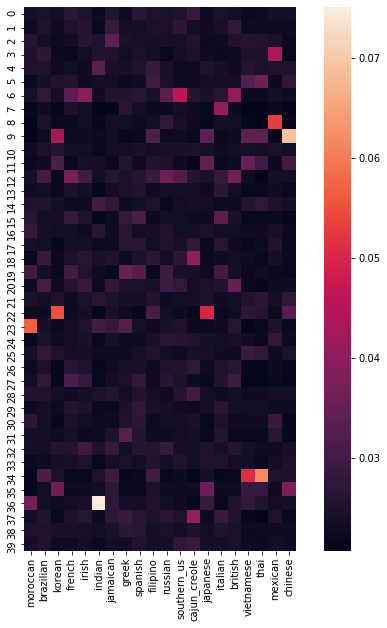

In [124]:
plot_matrix(tc_matrix)

Чем темнее квадрат в матрице, тем больше связь этой темы с данной кухней. Мы видим, что у нас есть темы, которые связаны с несколькими кухнями. Такие темы показывают набор ингредиентов, которые популярны в кухнях нескольких народов, то есть указывают на схожесть кухонь этих народов. Некоторые темы распределены по всем кухням равномерно, они показывают наборы продуктов, которые часто используются в кулинарии всех стран. 

Жаль, что в датасете нет названий рецептов, иначе темы было бы проще интерпретировать...

### Заключение
В этом задании вы построили несколько моделей LDA, посмотрели, на что влияют гиперпараметры модели и как можно использовать построенную модель. 